Get the land percentage change along with the elevation

For different elevation range, calculate the land percentage change

In [10]:
import time
import numpy as np
import os
from os.path import join
import sys
import glob
import pandas as pd
from datetime import datetime
from osgeo import gdal, gdal_array, gdalconst
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import earthpy.plot as ep
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns

pwd = os.getcwd()
rootpath = os.path.abspath(os.path.join(pwd, '../..'))
path_pythoncode = join(rootpath, 'pythoncode')
sys.path.append(path_pythoncode)


def get_land_pixel_pct_along_dem(img_country_mask, img_dem, array_dem_interval):
    """
        get the primary forest percentage along the elevation
        for example: the percentage of PF < 300m
    """
    pf_total_count = np.count_nonzero(img_country_mask > 0)

    land_pct_accumulate = np.zeros(array_dem_interval.shape, dtype=float)
    land_pct_interval = np.zeros(array_dem_interval.shape, dtype=float)

    for i_interval in range(0, len(array_dem_interval)):
        dem_threshold = array_dem_interval[i_interval]
        
        # get the accumulated percentage of land pixels below the elevation threshold
        pf_count_below_dem_threshold = np.count_nonzero((img_country_mask > 0) & (img_dem <= dem_threshold))
        land_pct_accumulate[i_interval] = pf_count_below_dem_threshold / pf_total_count
        
        # get the percentage of land pixels within the elevation interval
        if i_interval == 0:
            pf_count_interval = np.count_nonzero((img_country_mask > 0) & (img_dem <= dem_threshold))
        else:
            pf_count_interval = np.count_nonzero((img_country_mask > 0) & (img_dem <= dem_threshold) & (img_dem > array_dem_interval[i_interval - 1]))
        land_pct_interval[i_interval] = pf_count_interval / pf_total_count

    return land_pct_accumulate, land_pct_interval


def plot_pct(array_dem_interval, accumulate_pct, x_label="elevation (m)", y_label='percentage', title=None):
    """
        plot the percentage change along with the elevation
    """
    
    sns.set_theme()
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(32, 8))

    list_plot = []
    for p in array_dem_interval:
        list_plot.append(str(p))

    plt.bar(list_plot, accumulate_pct)

    tick_label_size = 22
    axis_label_size = 26
    title_label_size = 32
    tick_length = 4

    plt.xlabel(x_label, size=axis_label_size)
    plt.ylabel(y_label, size=axis_label_size)
    plt.title(title, size=title_label_size)

    axes.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    axes.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=True, which='major')

    plt.tight_layout()
    plt.show()

In [5]:
# np.nanmax(img_dem)

3097.0

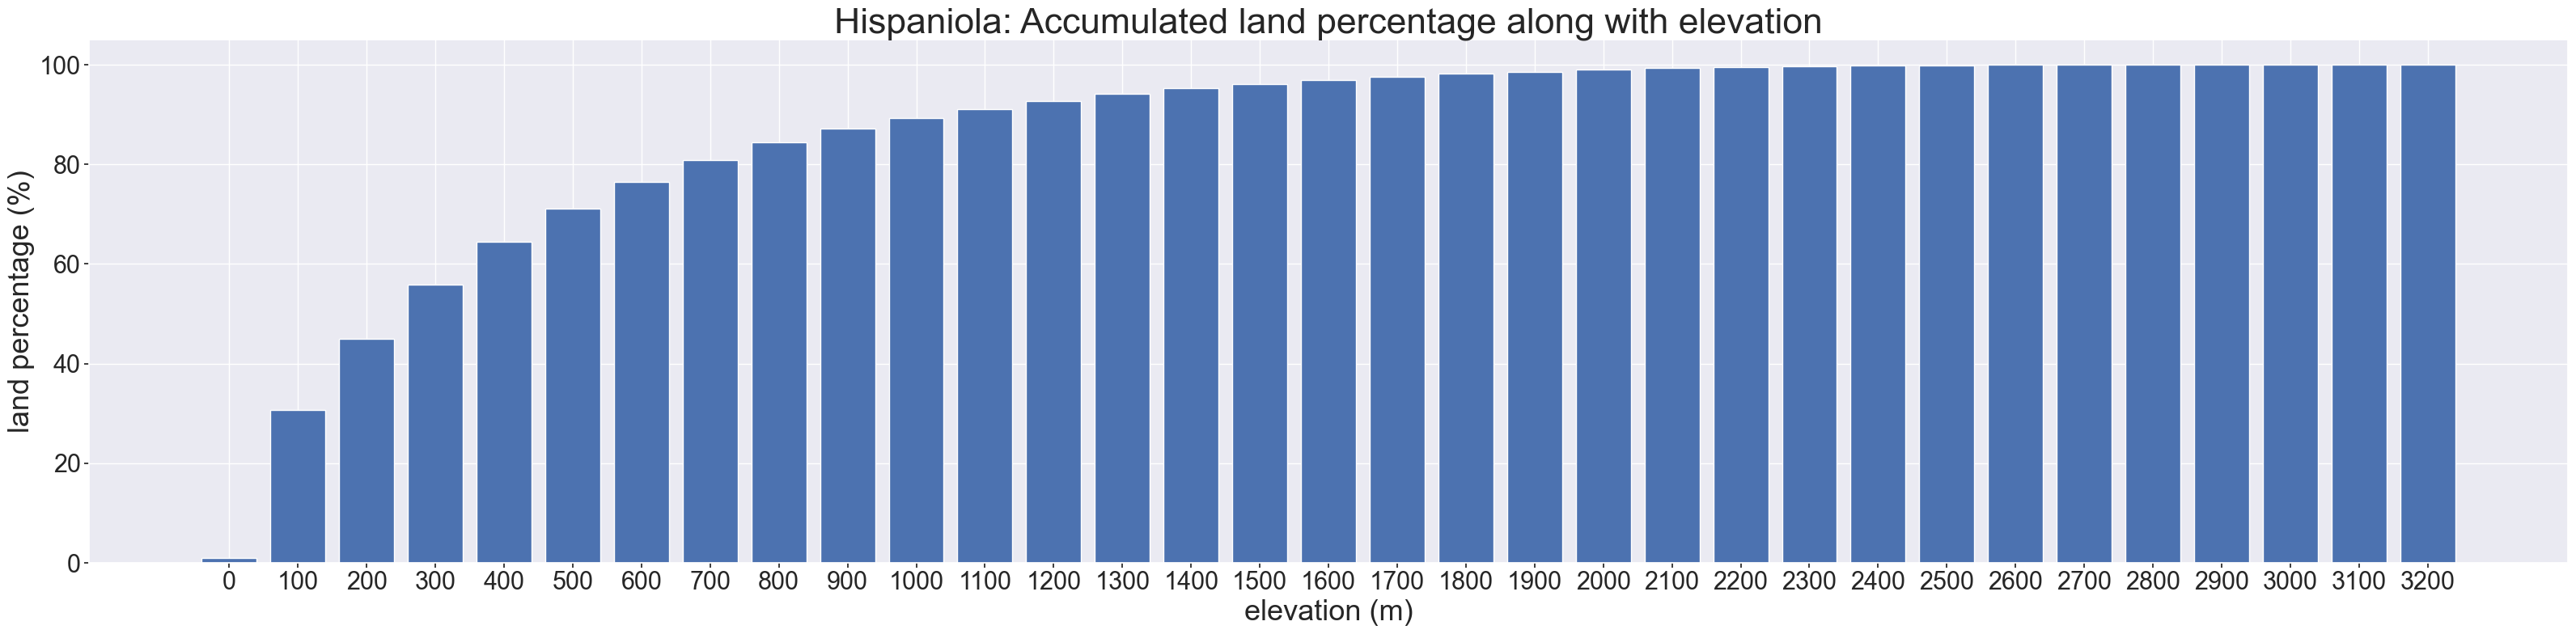

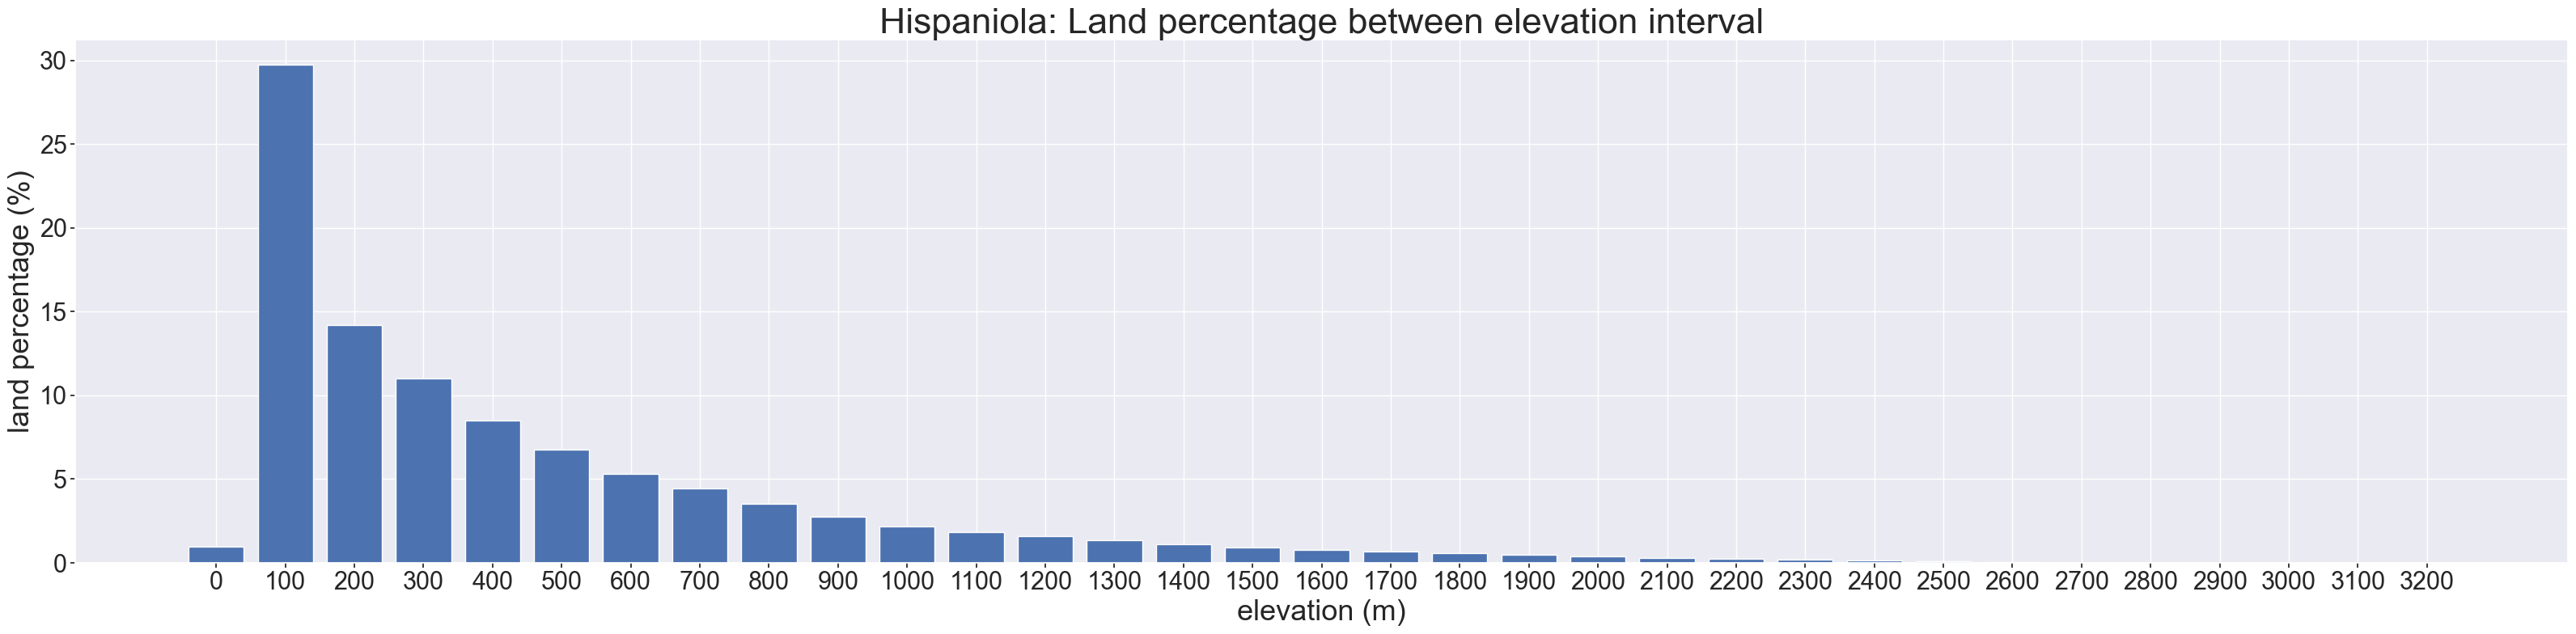

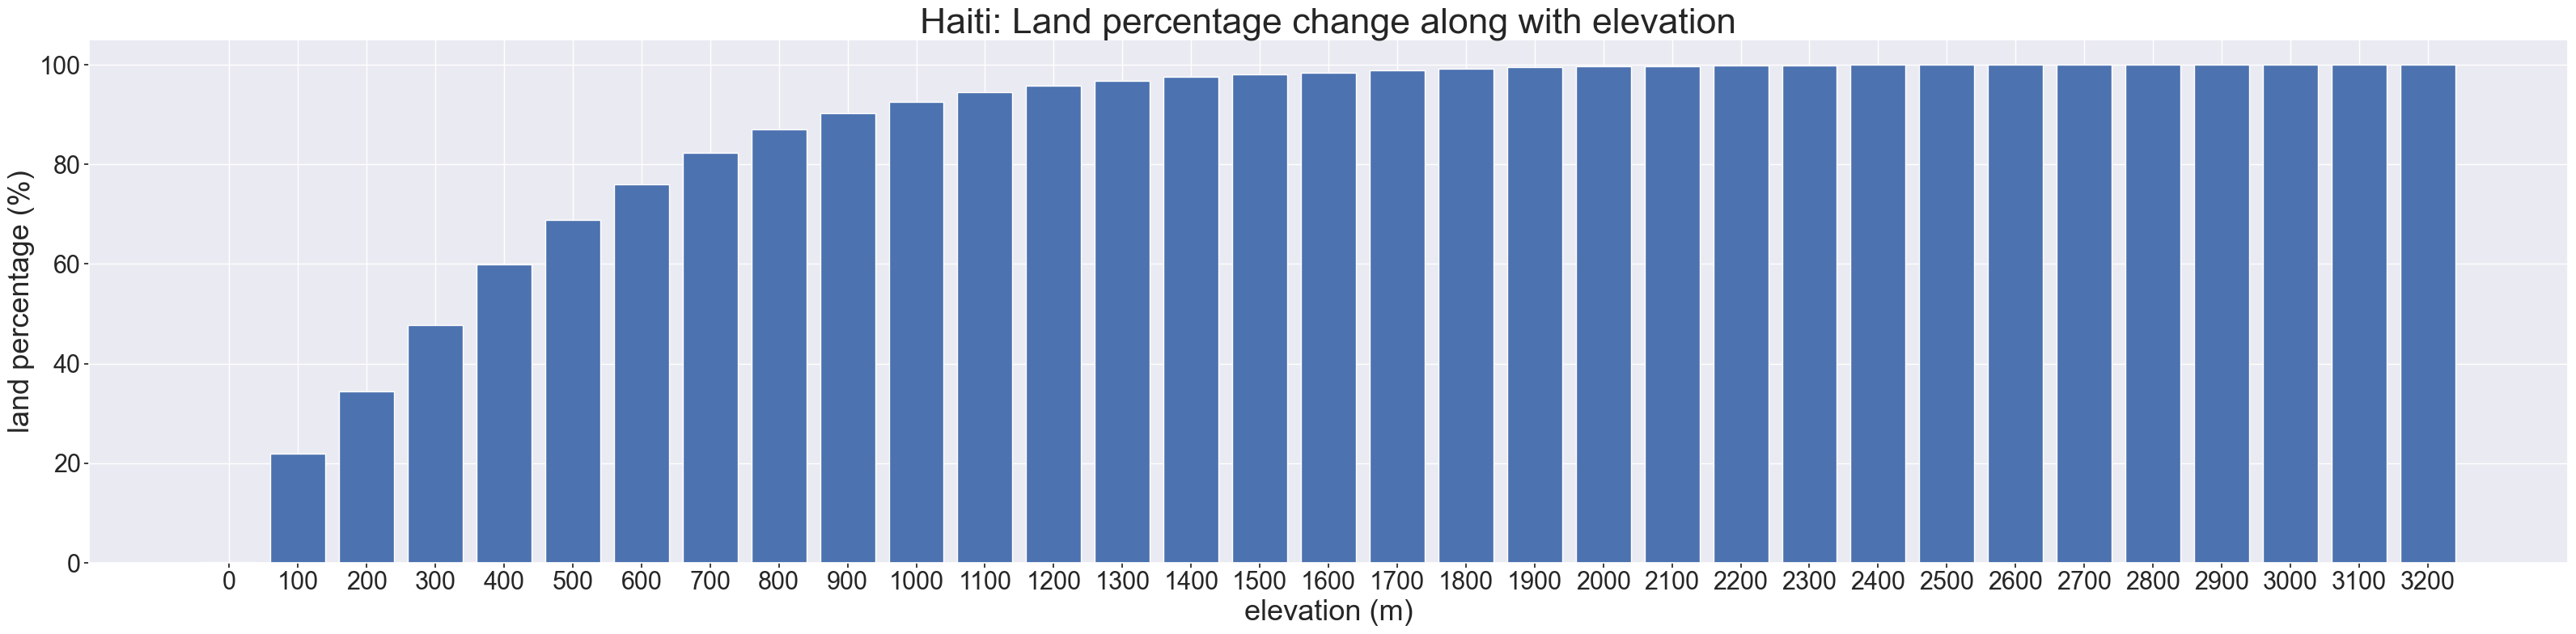

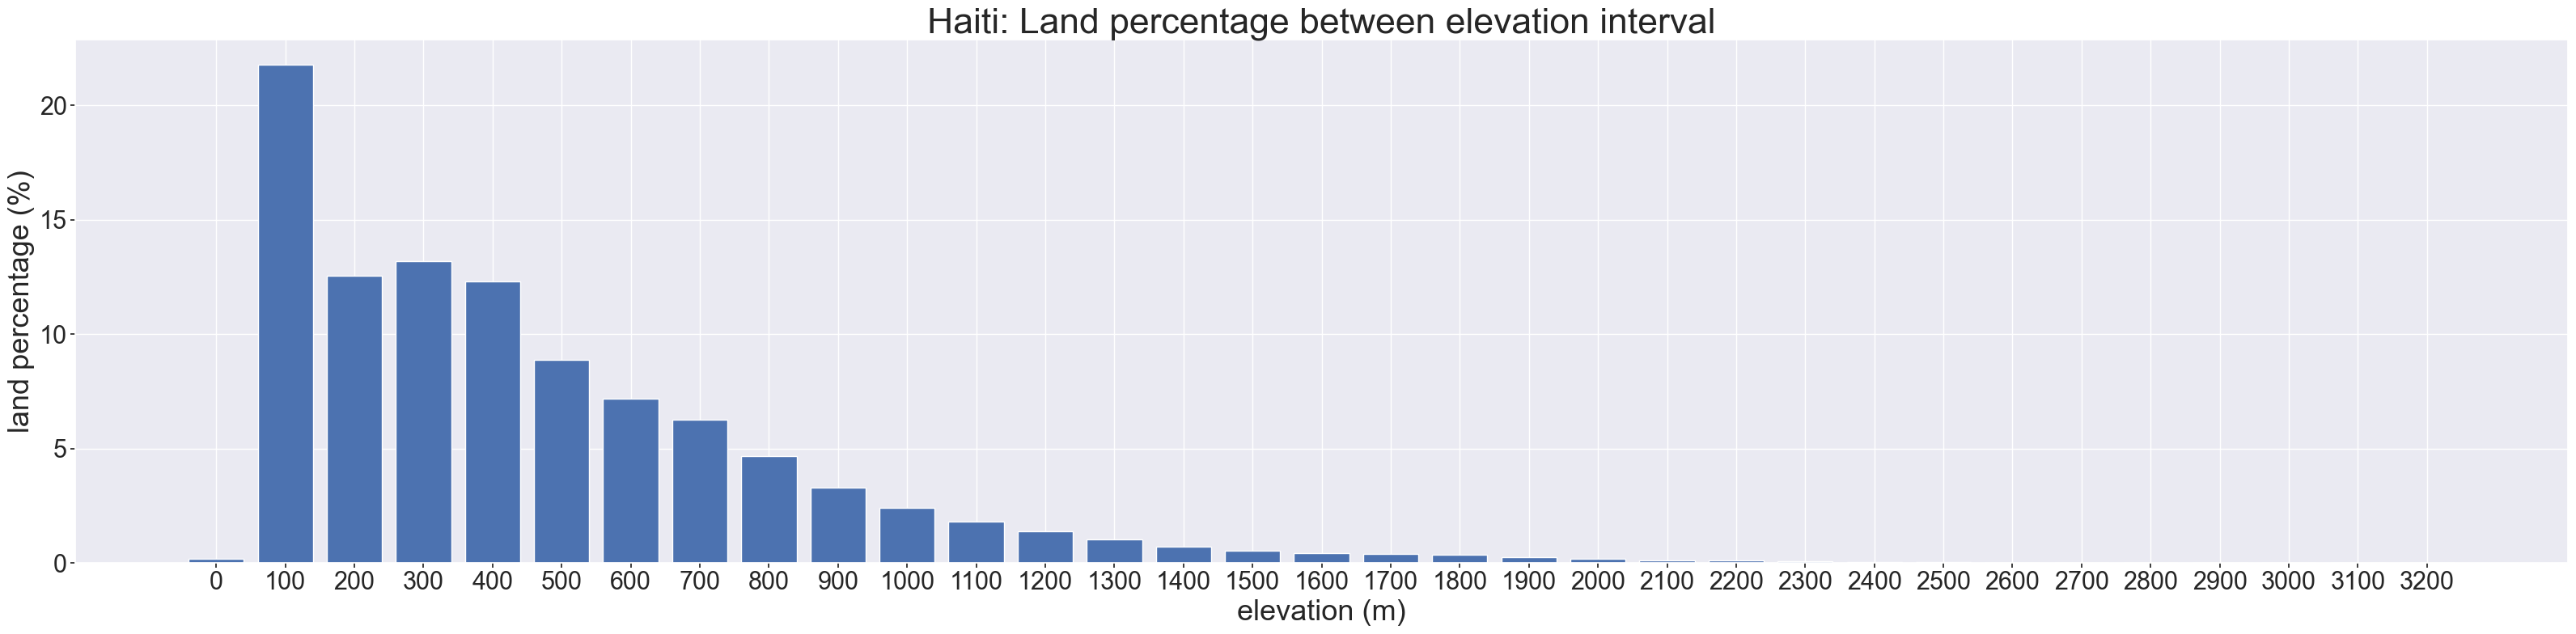

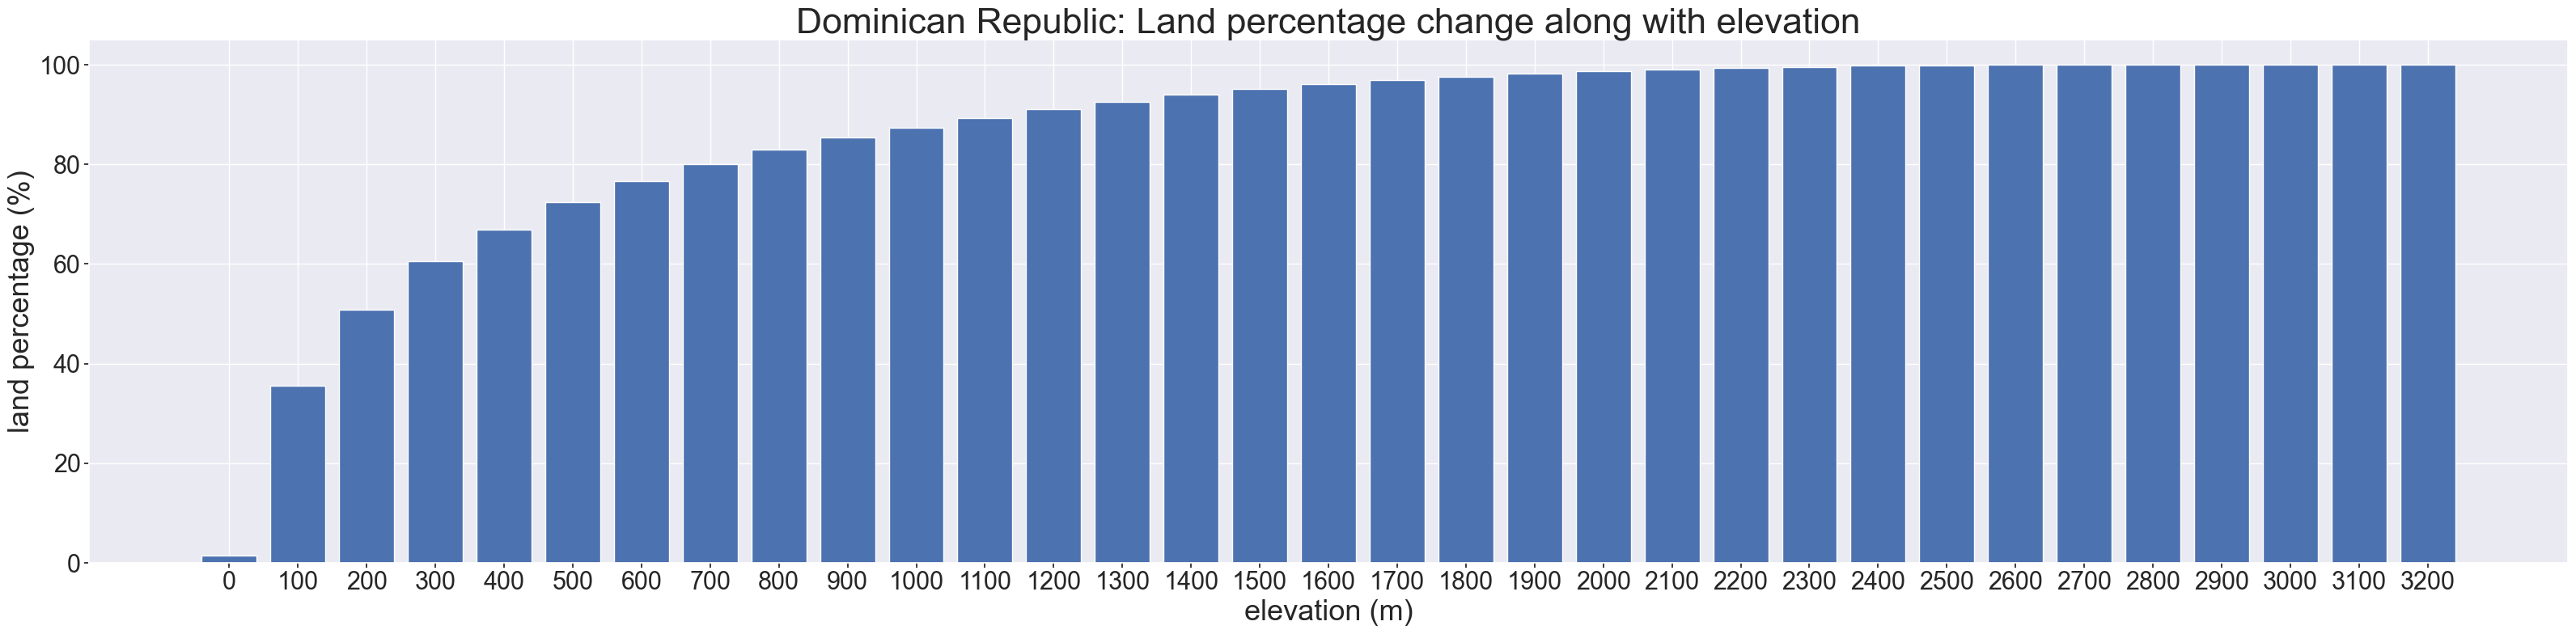

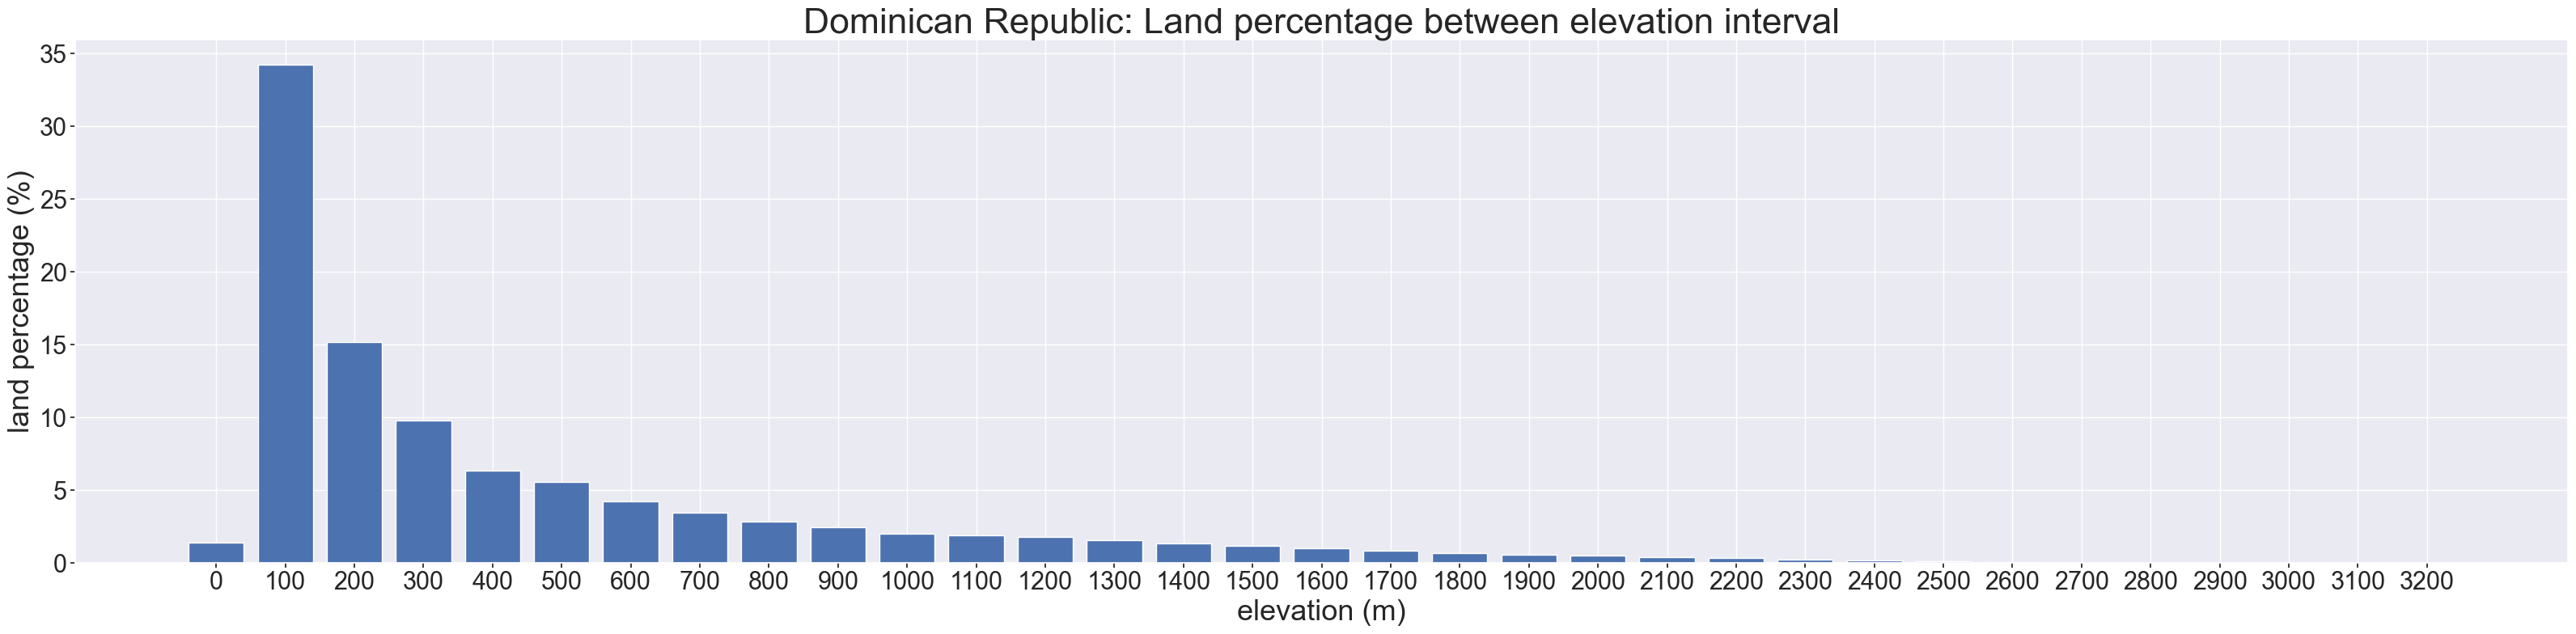

In [11]:
filename_country_id = join(rootpath, 'data', 'shapefile', 'landmask', 'countryid_hispaniola.tif')
img_country_id = gdal_array.LoadFile(filename_country_id)

img_dem = gdal_array.LoadFile(join(rootpath, 'data', 'dem', 'hispaniola_dem_info', 'dem_mosaic.tif'))

# array_dem_interval = np.concatenate([np.arange(50, 1000, 50), np.arange(1000, 2000, 100), np.arange(2000, 3300, 200)])
array_slope_interval = np.concatenate([np.arange(0, 3300, 100)])

land_pct_accumulate_hispaniola, land_pct_interval_hispaniola = get_land_pixel_pct_along_dem(img_country_id, img_dem, array_slope_interval)
plot_pct(array_slope_interval, land_pct_accumulate_hispaniola * 100, y_label='land percentage (%)', title='Hispaniola: Accumulated land percentage along with elevation')
plot_pct(array_slope_interval, land_pct_interval_hispaniola * 100, y_label='land percentage (%)', title='Hispaniola: Land percentage between elevation interval')

land_pct_accumulate_haiti, land_pct_interval_haiti = get_land_pixel_pct_along_dem(img_country_id[img_country_id == 1], img_dem[img_country_id == 1], array_slope_interval)
plot_pct(array_slope_interval, land_pct_accumulate_haiti * 100, y_label='land percentage (%)', title='Haiti: Land percentage change along with elevation')
plot_pct(array_slope_interval, land_pct_interval_haiti * 100, y_label='land percentage (%)', title='Haiti: Land percentage between elevation interval')

land_pct_accumulate_dr, land_pct_interval_dr = get_land_pixel_pct_along_dem(img_country_id[img_country_id == 2], img_dem[img_country_id == 2], array_slope_interval)
plot_pct(array_slope_interval, land_pct_accumulate_dr * 100, y_label='land percentage (%)', title='Dominican Republic: Land percentage change along with elevation')
plot_pct(array_slope_interval, land_pct_interval_dr * 100, y_label='land percentage (%)', title='Dominican Republic: Land percentage between elevation interval')


In [15]:
# print(np.nanmax(img_slope))
# print(np.nanpercentile(img_slope, 99))
# print(np.nanpercentile(img_slope, 95))

79.64918
35.58107376098633
23.76524543762207


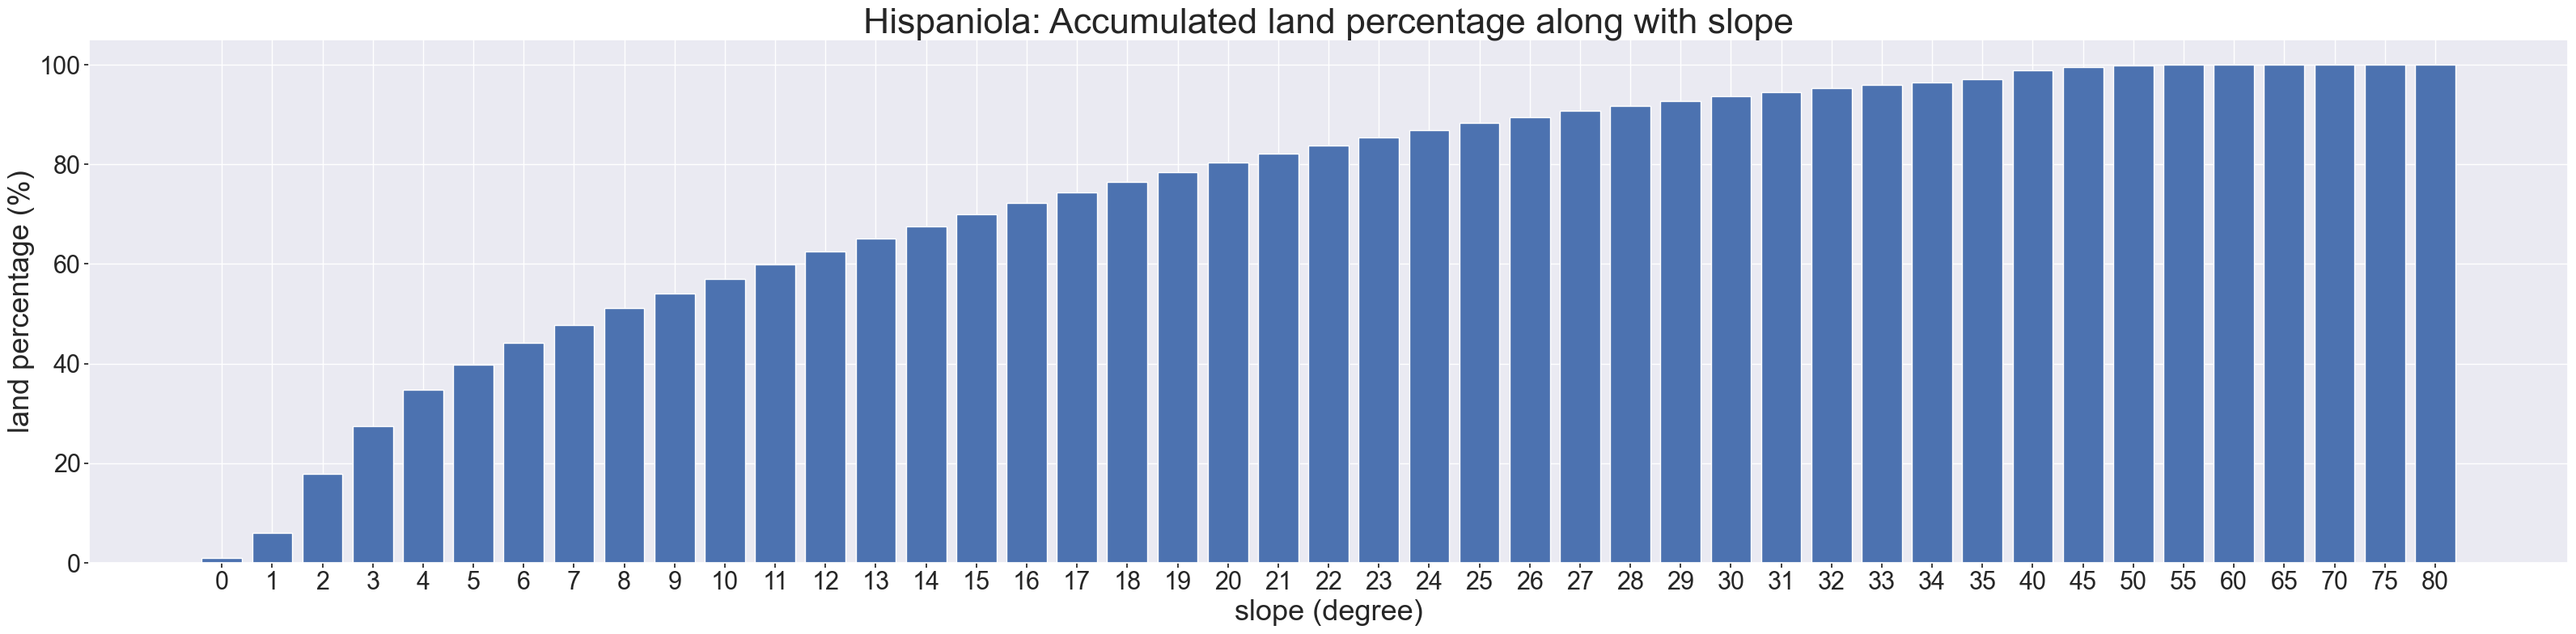

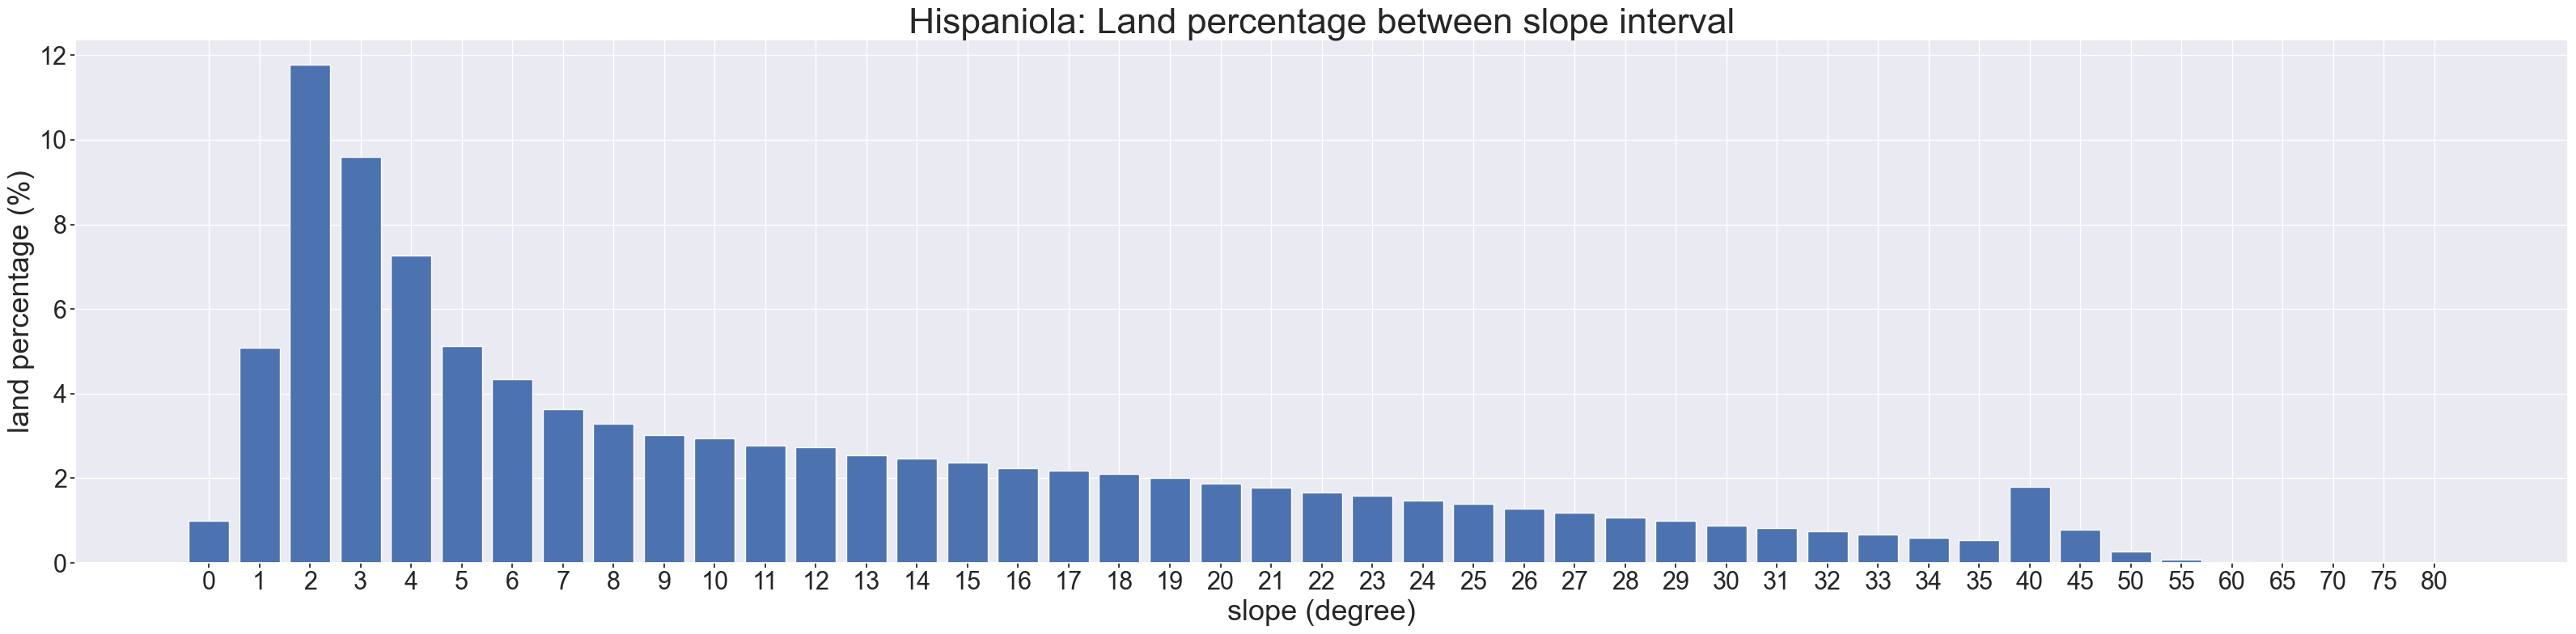

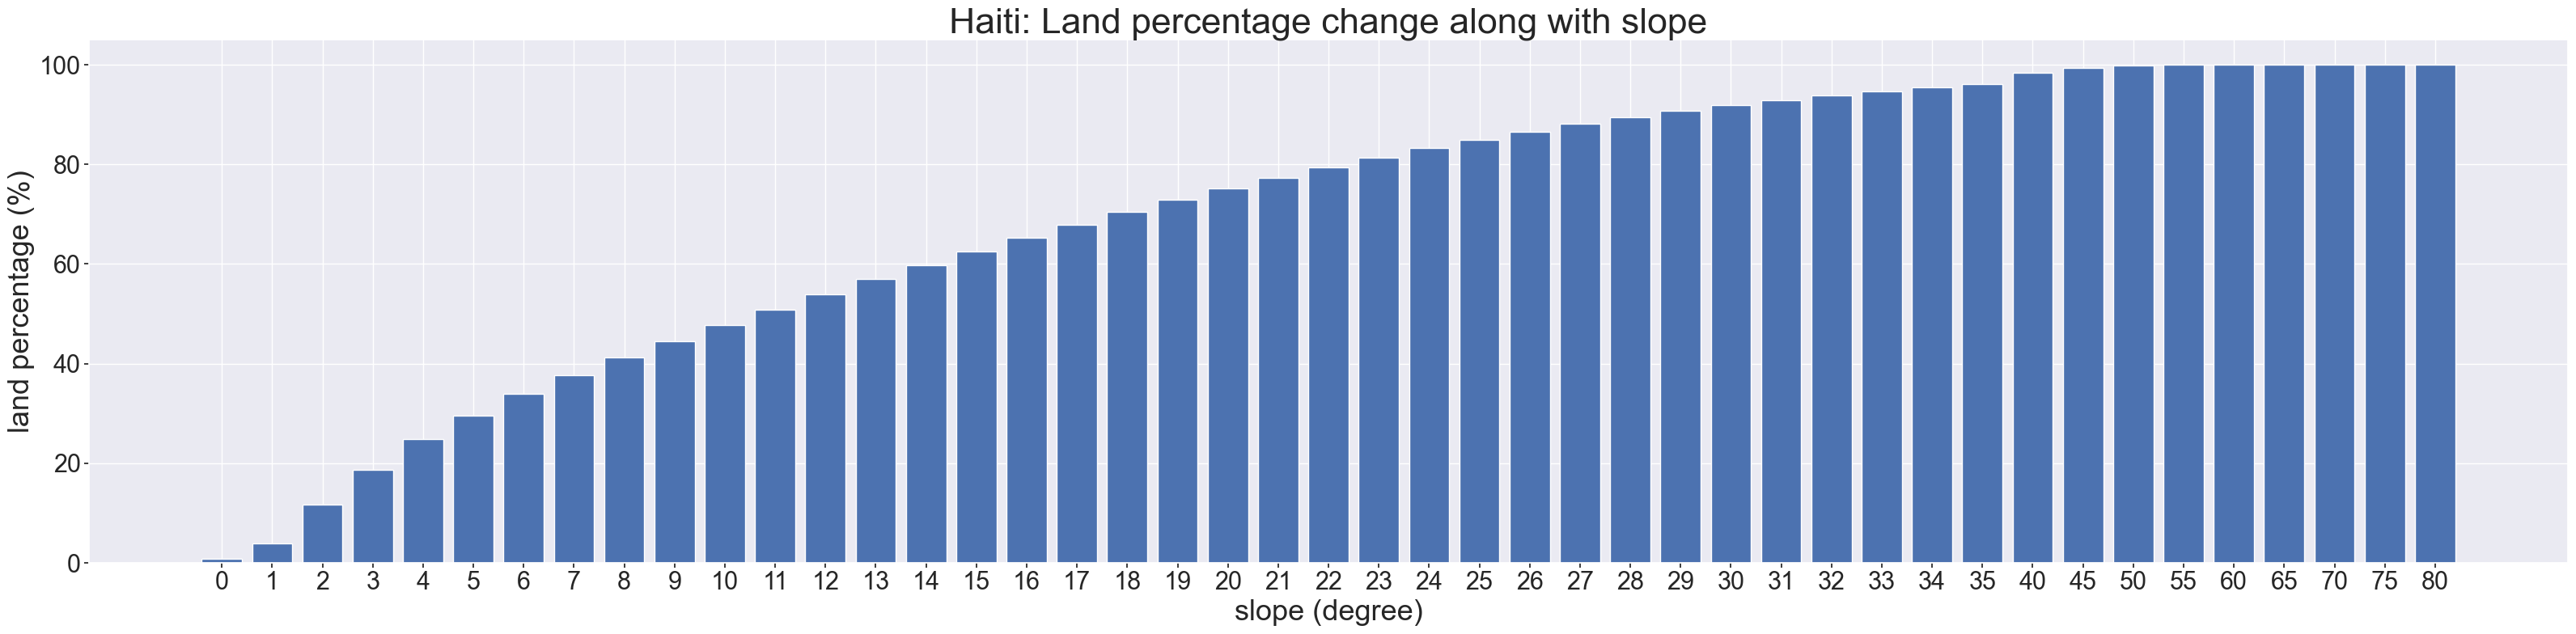

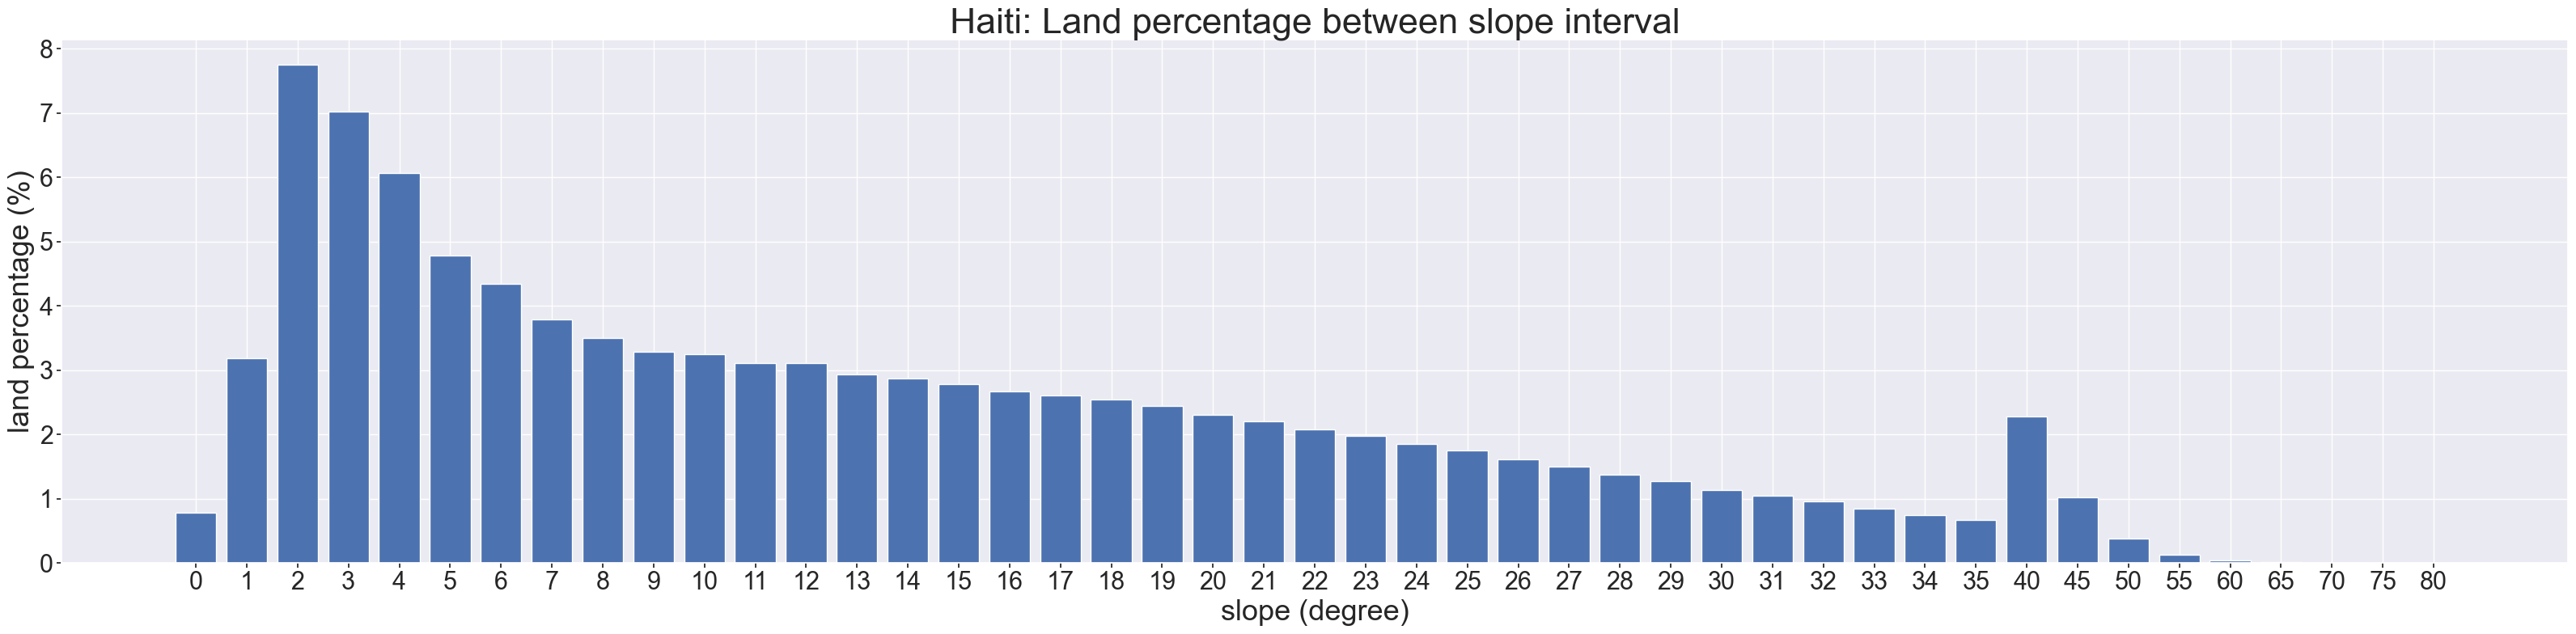

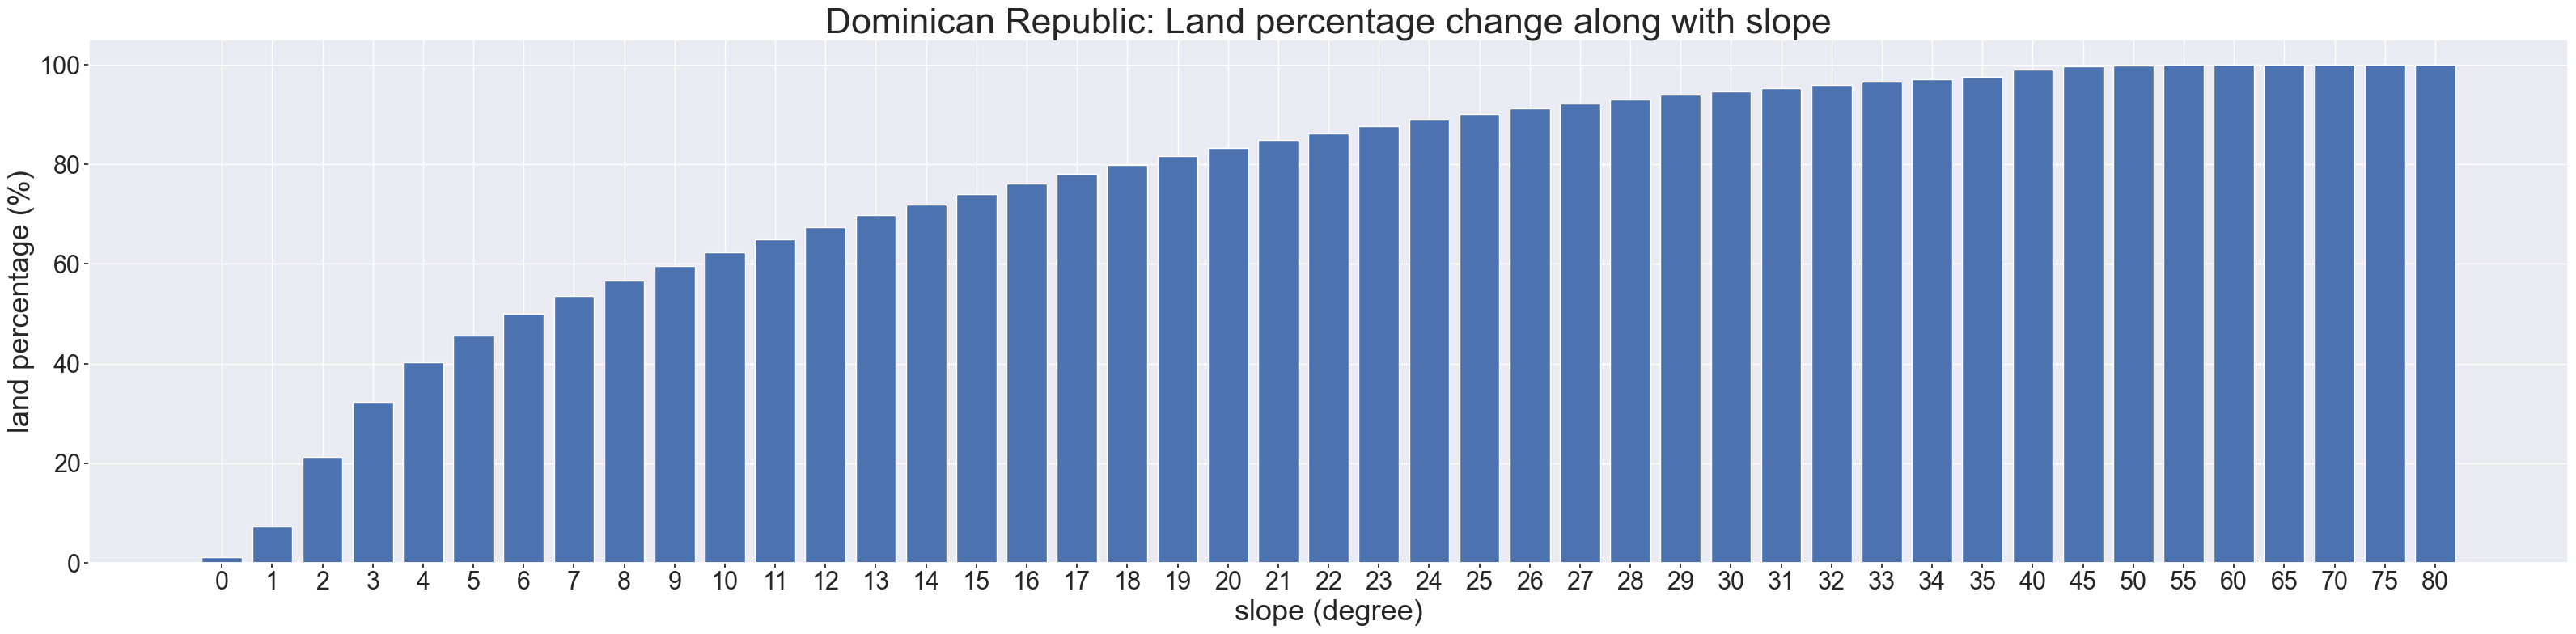

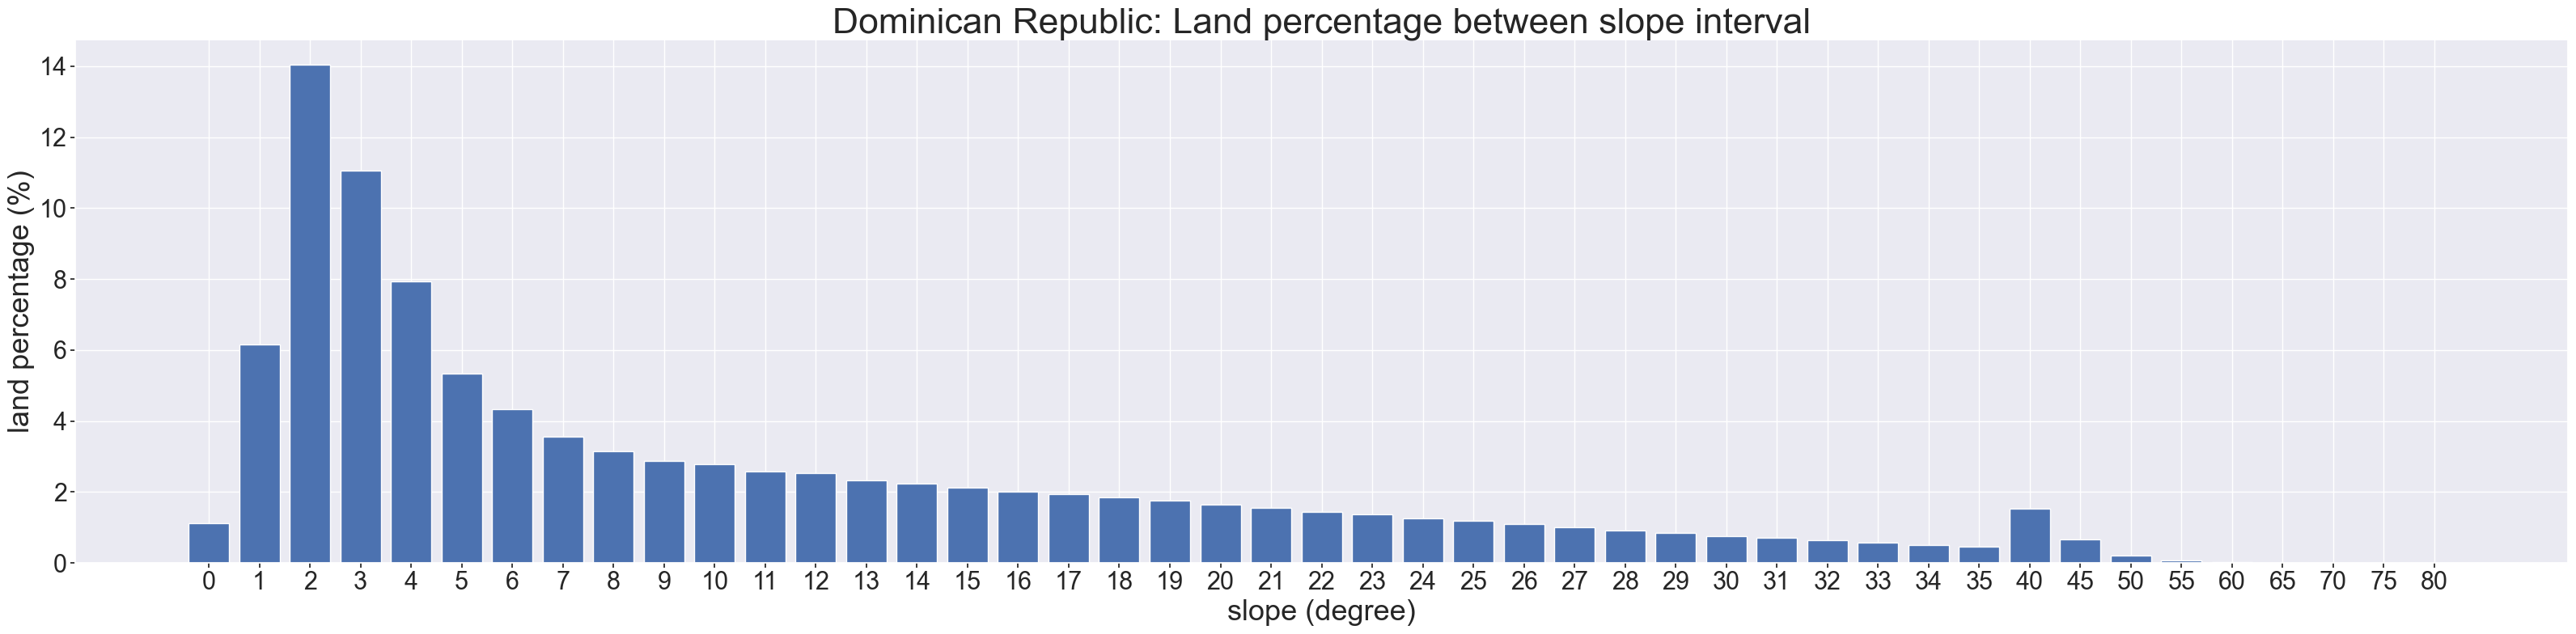

In [19]:
filename_country_id = join(rootpath, 'data', 'shapefile', 'landmask', 'countryid_hispaniola.tif')
img_country_id = gdal_array.LoadFile(filename_country_id)

img_slope = gdal_array.LoadFile(join(rootpath, 'data', 'dem', 'hispaniola_dem_info', 'slope_mosaic.tif'))

# array_slope_interval = np.concatenate([np.arange(0, 35, 1)])
array_slope_interval = np.concatenate([np.arange(0, 35, 1), np.arange(35, 81, 5)])

land_pct_accumulate_hispaniola, land_pct_interval_hispaniola = get_land_pixel_pct_along_dem(img_country_id, img_slope, array_slope_interval)
plot_pct(array_slope_interval, land_pct_accumulate_hispaniola * 100, x_label='slope (degree)', y_label='land percentage (%)', title='Hispaniola: Accumulated land percentage along with slope')
plot_pct(array_slope_interval, land_pct_interval_hispaniola * 100, x_label='slope (degree)',y_label='land percentage (%)', title='Hispaniola: Land percentage between slope interval')

land_pct_accumulate_haiti, land_pct_interval_haiti = get_land_pixel_pct_along_dem(img_country_id[img_country_id == 1], img_slope[img_country_id == 1], array_slope_interval)
plot_pct(array_slope_interval, land_pct_accumulate_haiti * 100, x_label='slope (degree)',y_label='land percentage (%)', title='Haiti: Land percentage change along with slope')
plot_pct(array_slope_interval, land_pct_interval_haiti * 100, x_label='slope (degree)',y_label='land percentage (%)', title='Haiti: Land percentage between slope interval')

land_pct_accumulate_dr, land_pct_interval_dr = get_land_pixel_pct_along_dem(img_country_id[img_country_id == 2], img_slope[img_country_id == 2], array_slope_interval)
plot_pct(array_slope_interval, land_pct_accumulate_dr * 100, x_label='slope (degree)',y_label='land percentage (%)', title='Dominican Republic: Land percentage change along with slope')
plot_pct(array_slope_interval, land_pct_interval_dr * 100, x_label='slope (degree)',y_label='land percentage (%)', title='Dominican Republic: Land percentage between slope interval')
